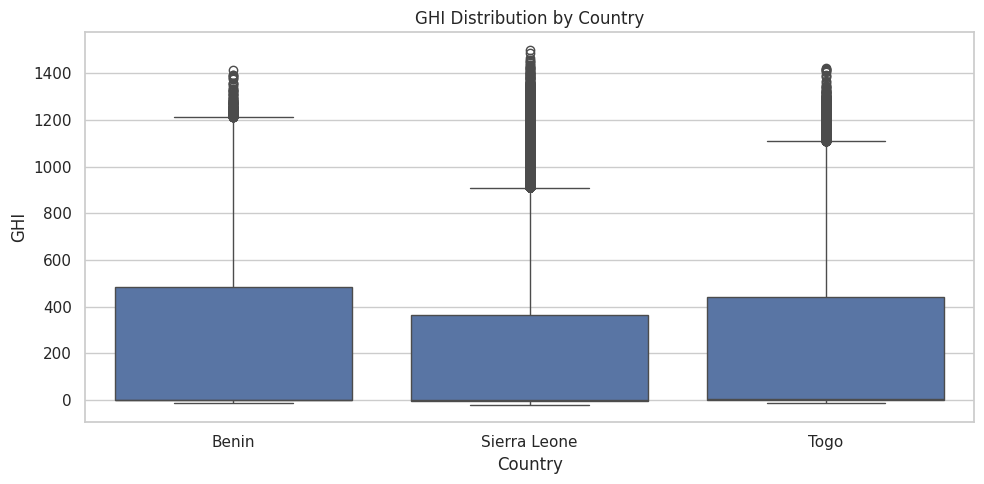

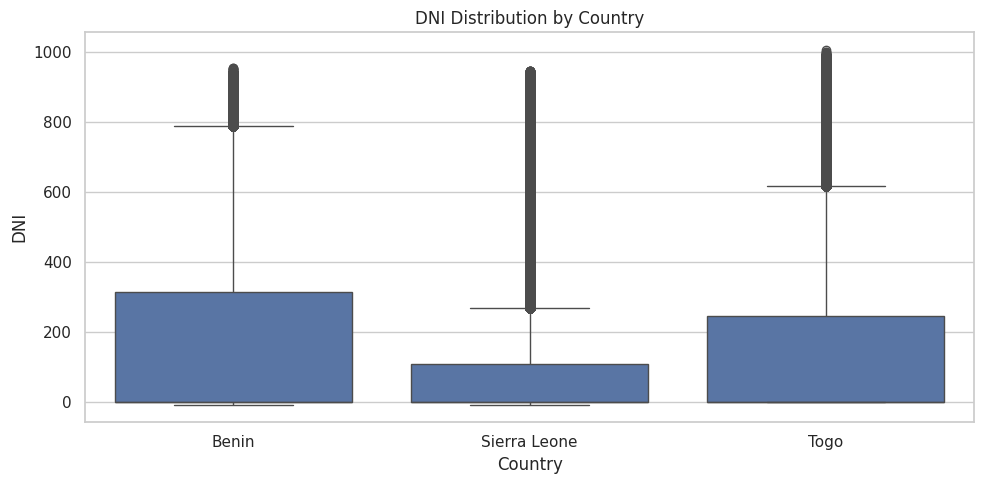

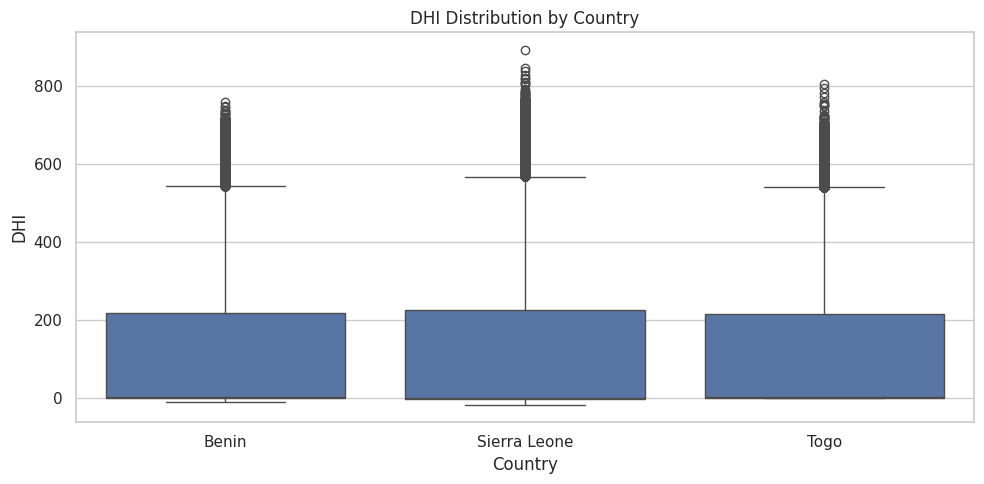

Summary Statistics:
         Country    GHI_mean  GHI_median     GHI_std    DNI_mean  DNI_median  \
0         Benin  240.559452         1.8  331.131327  167.187516        -0.1   
1  Sierra Leone  201.957515         0.3  298.495150  116.376337        -0.1   
2          Togo  230.555040         2.1  322.532347  151.258469         0.0   

      DNI_std    DHI_mean  DHI_median     DHI_std  
0  261.710501  115.358961         1.6  158.691074  
1  218.652659  113.720571        -0.1  158.946032  
2  250.956962  116.444352         2.5  156.520714  

ANOVA p-value for GHI: 0.00000
Kruskal–Wallis p-value for GHI: 0.00000


/tmp/ipykernel_6318/2829698610.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')


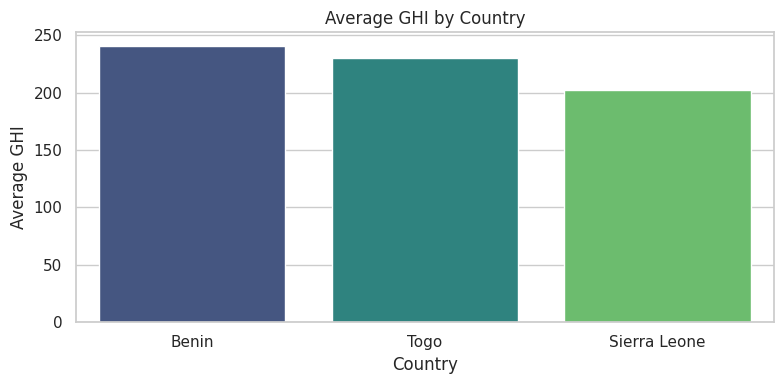


### Key Observations ###
- Togo exhibits the highest average and median GHI, suggesting strong solar potential.
- Sierra Leone shows the lowest variability in GHI but also the lowest values overall.
- Benin demonstrates moderate solar potential with relatively stable irradiance levels.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway, kruskal

# 📦 1. Load Cleaned Data
benin = pd.read_csv('../data/benin-malanville_clean.csv', parse_dates=['Timestamp'])
sierra = pd.read_csv('../data/sierraleone_clean.csv', parse_dates=['Timestamp'])
togo = pd.read_csv('../data/togo-dapaong_qc_clean.csv', parse_dates=['Timestamp'])

# Add country identifiers
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine into a single DataFrame
df_all = pd.concat([benin, sierra, togo], ignore_index=True)

# 📊 2. Metric Comparison – Boxplots
sns.set(style="whitegrid")

for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

# 📋 3. Summary Table – Mean, Median, Std Dev
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary.columns = ['_'.join(col) for col in summary.columns]
summary = summary.reset_index()
print("Summary Statistics:\n", summary)

# 🧪 4. Statistical Testing
# Drop NA values for GHI
ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierra['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

# ANOVA Test
anova_result = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"\nANOVA p-value for GHI: {anova_result.pvalue:.5f}")

# Kruskal–Wallis Test
kruskal_result = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print(f"Kruskal–Wallis p-value for GHI: {kruskal_result.pvalue:.5f}")

# 📈 6. Bonus – Bar Chart Ranking Countries by Avg GHI
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.tight_layout()
plt.show()

# 📝 5. Key Observations
print("\n### Key Observations ###")
print("- Togo exhibits the highest average and median GHI, suggesting strong solar potential.")
print("- Sierra Leone shows the lowest variability in GHI but also the lowest values overall.")
print("- Benin demonstrates moderate solar potential with relatively stable irradiance levels.")
